# Importing Libraries & Data

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import keras 
import tensorflow as tf

In [123]:
train=pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv')
id=test['id']
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
train.shape

(193573, 11)

In [7]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24


In [8]:
test.shape

(129050, 10)

# Explore Data

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [10]:
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [11]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [12]:
train.describe(include='O').transpose()

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


# Check Null Values

In [13]:
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
train.isna().values.any()

False

# Duplicated values

In [15]:
train[train.duplicated()]

,id,carat,cut,color,clarity,depth,table,x,y,z,price


In [124]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


# Data Analysis & Visualization

In [17]:
train['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

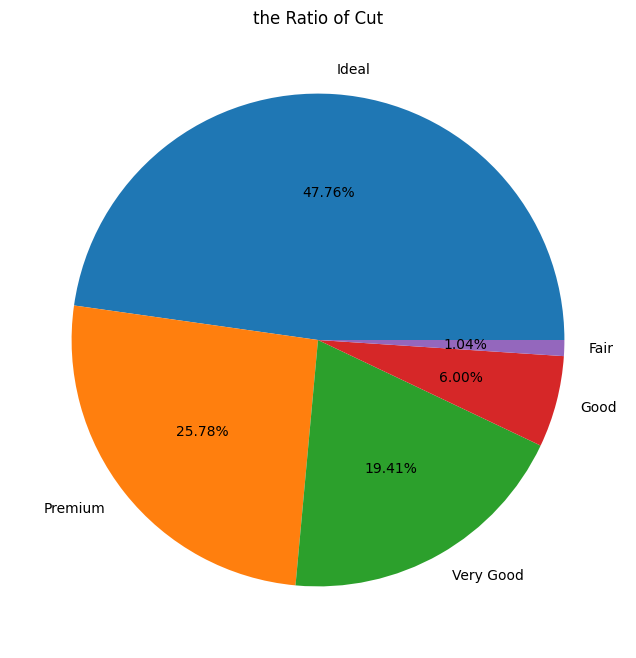

In [25]:
#show Ratio of cut from train
plt.figure(figsize=(8,8))
plt.pie(x = train['cut'].value_counts() ,autopct='%1.2f%%' ,labels=train['cut'].value_counts().index)
plt.title('the Ratio of Cut')
plt.show

In [19]:
train['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

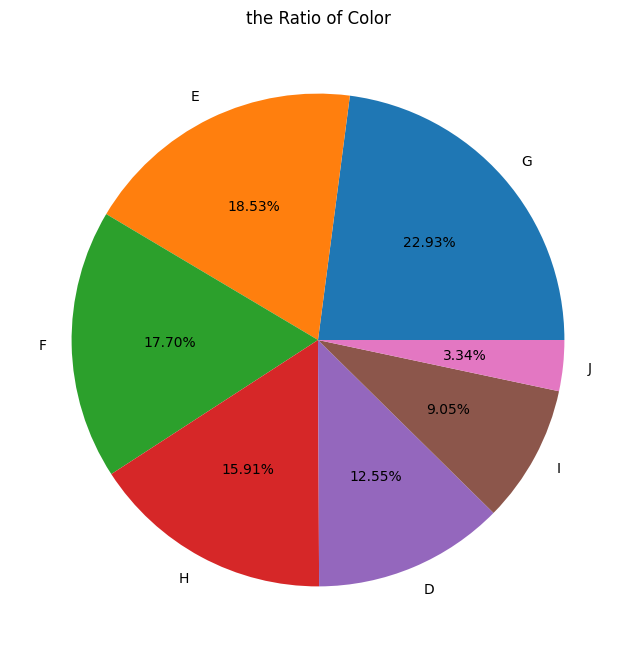

In [24]:
#show Ratio of color from train
plt.figure(figsize=(8,8))
plt.pie(x = train['color'].value_counts() ,autopct='%1.2f%%' ,labels=train['color'].value_counts().index)
plt.title('the Ratio of Color')
plt.show

In [21]:
train['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

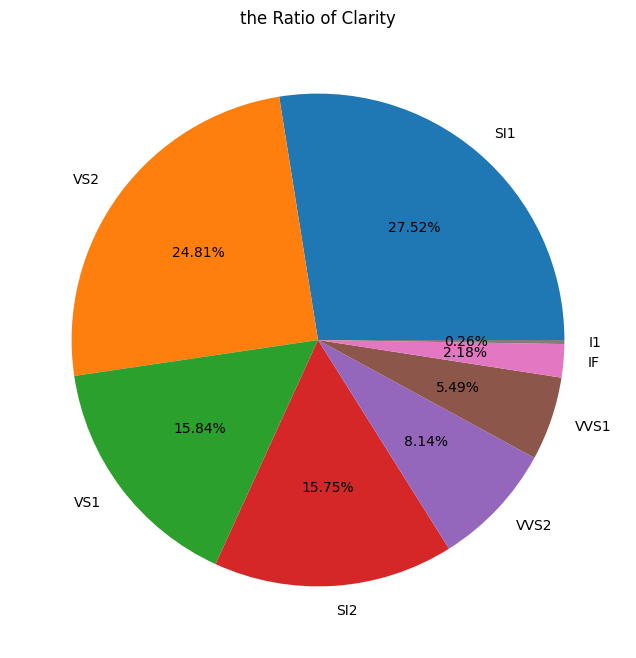

In [23]:
#show Ratio of clarity from train
plt.figure(figsize=(8,8))
plt.pie(x = train['clarity'].value_counts() ,autopct='%1.2f%%' ,labels=train['clarity'].value_counts().index)
plt.title('the Ratio of Clarity')
plt.show

In [32]:
train['price'].value_counts()

544      542
605      464
789      454
828      438
776      437
        ... 
3807       1
4621       1
11165      1
9609       1
12094      1
Name: price, Length: 8738, dtype: int64

(array([90649., 32951., 26591., 14264.,  8505.,  6217.,  4642.,  3683.,
         3255.,  2816.]),
 array([  326. ,  2175.2,  4024.4,  5873.6,  7722.8,  9572. , 11421.2,
        13270.4, 15119.6, 16968.8, 18818. ]),
 <BarContainer object of 10 artists>)

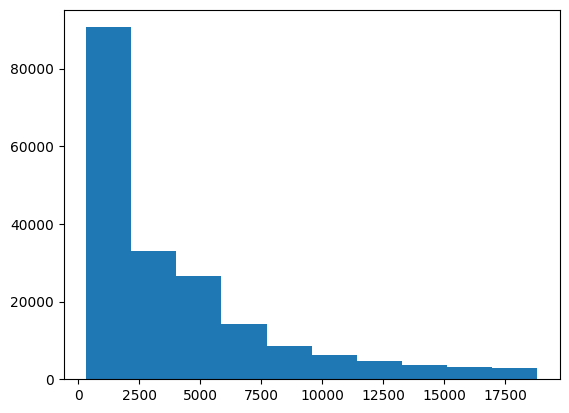

In [31]:
plt.hist(train['price'])

# Check the Distribution and skewness of the features

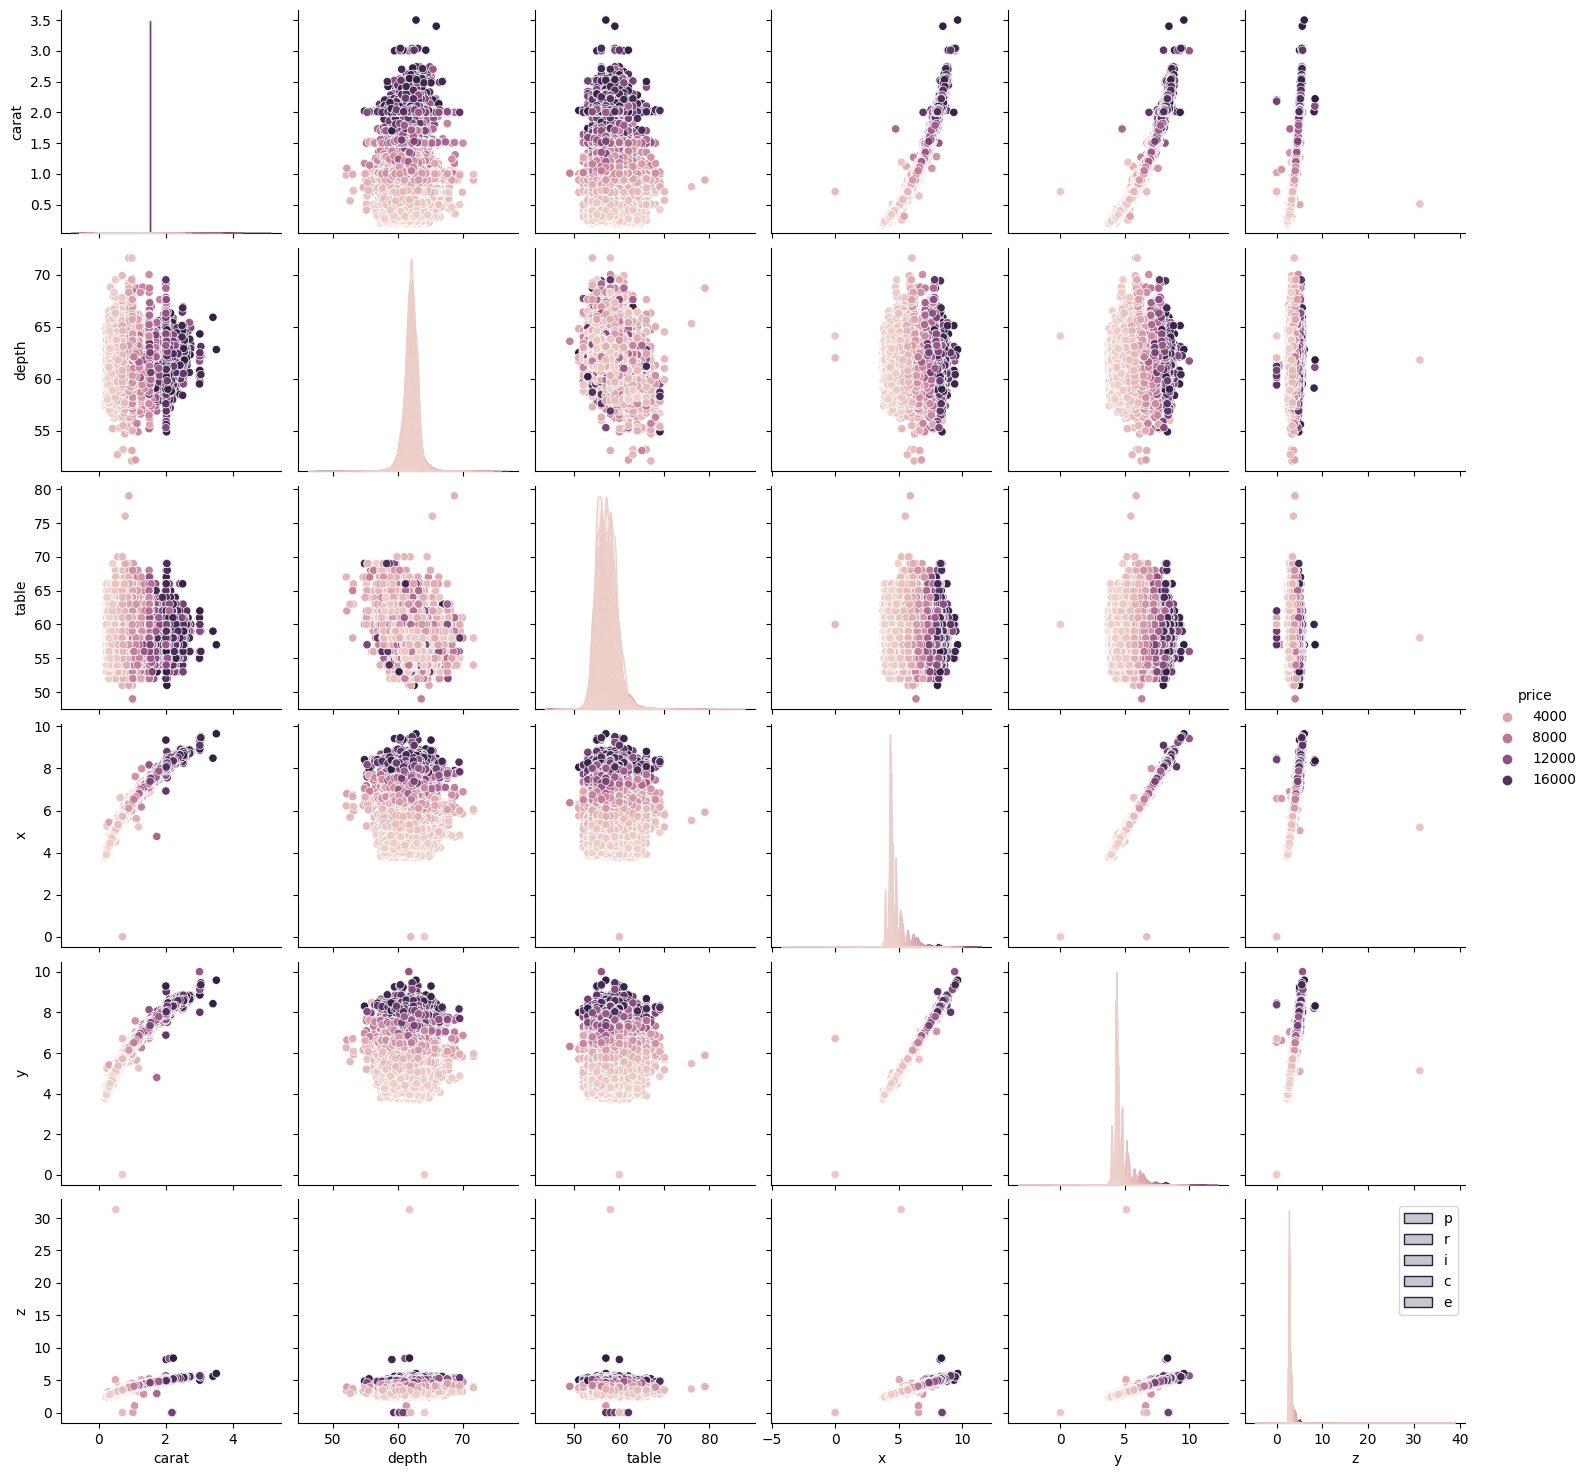

In [33]:
sns.pairplot(data = train , hue= 'price')
plt.legend('price')

# Object Columns

In [35]:
obj=train.select_dtypes(include=object).columns
pd.DataFrame(obj,columns=['Object Columns'])

,Object Columns
0,cut
1,color
2,clarity


# Transform Object Columns

In [128]:
label=LabelEncoder()
for col in obj:
    train[col]=label.fit_transform(train[col])
    test[col]=label.fit_transform(test[col])
train

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,2,0,7,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,3,3,7,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,4,2,2,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,4,0,2,62.9,55.0,4.45,4.49,2.81,681


# Show Data Correlation

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.081705,0.292400,-0.209095,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
cut,0.081705,1.000000,0.020030,-0.036079,-0.126401,0.312647,0.082273,0.084185,0.070513,0.070953
color,0.292400,0.020030,1.000000,0.018920,0.035517,0.034978,0.269394,0.269509,0.270132,0.210859
clarity,-0.209095,-0.036079,0.018920,1.000000,-0.048809,-0.104381,-0.228876,-0.228173,-0.230717,-0.092149
depth,0.027852,-0.126401,0.035517,-0.048809,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,0.312647,0.034978,-0.104381,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,0.082273,0.269394,-0.228876,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,0.084185,0.269509,-0.228173,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.070513,0.270132,-0.230717,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.070953,0.210859,-0.092149,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


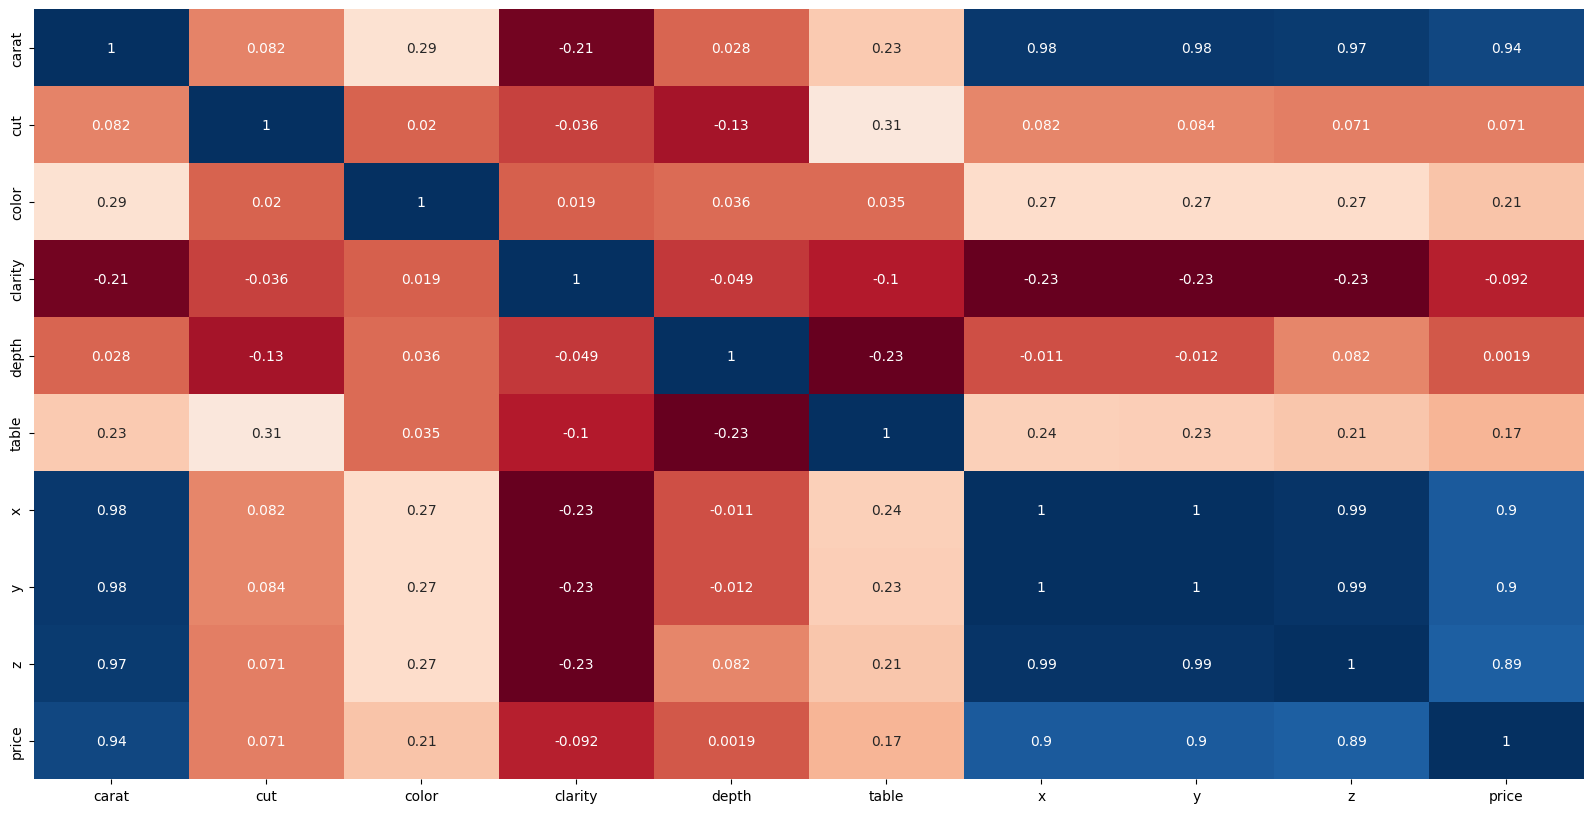

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cbar=False,cmap='RdBu')
train.corr()

# Show Input X and Output y

In [39]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]
key=X.keys()

In [40]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,2,0,7,61.1,56.0,4.35,4.39,2.67
193569,0.70,3,3,7,60.3,58.0,5.75,5.77,3.47
193570,0.73,4,2,2,63.1,57.0,5.72,5.75,3.62
193571,0.34,4,0,2,62.9,55.0,4.45,4.49,2.81


In [41]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

# Model Building

In [81]:
class Model:
    def select_feature(self,model,X,y):
        FeatureSelection = SelectFromModel(estimator =model)
        X = FeatureSelection.fit_transform(X, y)
        print('X Shape is ' , X.shape)
        return FeatureSelection.get_support()
    def GridSearchCV(self,model_choose,SelectedParameters,X,y):
        GridSearchModel = GridSearchCV(model_choose,SelectedParameters, cv = 2,return_train_score=True)
        GridSearchModel.fit(X, y)
        print('Best Score is :', GridSearchModel.best_score_)
        print('Best Parameters are :', GridSearchModel.best_params_)
        print('Best Estimator is :', GridSearchModel.best_estimator_)
    def Splitting_Data(self,X,y,test_size):
        X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=33, shuffle =True)
        print('X_train shape is ' ,X_train.shape)
        print('X_test shape is ' ,X_test.shape)
        print('y_train shape is ' ,y_train.shape)
        print('y_test shape is ' , y_test.shape)
        print('y_train value count is :\n' ,y_train.value_counts())
        print('y_test value count is :\n' ,y_test.value_counts())
        return X_train,X_test,y_train,y_test
    def MinMax(self,X):
        scaler = MinMaxScaler(feature_range=(0, 1))
        X_scale = scaler.fit_transform(X)
        return pd.DataFrame(X_scale,columns=key)
    def model(self,model_bulding,X_train,y_train,X_test,y_test):
        model_bulding.fit(X_train,y_train)
        print('model_bulding Train Score is : ' , model_bulding.score(X_train,y_train))
        print('model_bulding Test Score is : ' , model_bulding.score(X_test,y_test))
        #print('model_bulding features importances are : ' , model_bulding.feature_importances_)
        return model_bulding
    def Prediction(self,model,X_test):
        self.y_pred = model.predict(X_test)
        #y_pred_prob = model.predict_proba(X_test)
        print('Predicted Value for model is : ' ,self.y_pred[:10])
        #print('Prediction Probabilities Value for model is : ' , y_pred_prob[:10])
        return self.y_pred
    def model_check(self,y_test):
        #Calculating Mean Absolute Error
        MAEValue = mean_absolute_error(y_test, self.y_pred, multioutput='uniform_average')
        print('Mean Absolute Error Value is : ', MAEValue)
        #Calculating Mean Squared Error
        MSEValue = mean_squared_error(y_test, self.y_pred, multioutput='uniform_average')
        print('Mean Squared Error Value is : ', MSEValue)
        #Calculating Median Absolute Error
        MdSEValue = median_absolute_error(y_test, self.y_pred)
        print('Median Absolute Error Value is : ', MdSEValue )

In [82]:
model1=Model()

# MinMax

In [129]:
X=model1.MinMax(X)
test=model1.MinMax(test)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.400000,0.75,0.333333,0.714286,0.517949,0.300000,0.753368,0.732268,0.145367
1,0.554545,1.00,1.000000,0.428571,0.507692,0.300000,0.835233,0.811189,0.161342
2,0.151515,0.50,0.500000,0.571429,0.466667,0.266667,0.589637,0.572428,0.111821
3,0.036364,0.50,0.500000,0.571429,0.487179,0.233333,0.453886,0.440559,0.086581
4,0.454545,0.75,0.500000,0.714286,0.538462,0.333333,0.792746,0.760240,0.152396
...,...,...,...,...,...,...,...,...,...
193568,0.033333,0.50,0.000000,1.000000,0.461538,0.233333,0.450777,0.438561,0.085304
193569,0.151515,0.75,0.500000,1.000000,0.420513,0.300000,0.595855,0.576424,0.110863
193570,0.160606,1.00,0.333333,0.285714,0.564103,0.266667,0.592746,0.574426,0.115655
193571,0.042424,1.00,0.000000,0.285714,0.553846,0.200000,0.461140,0.448551,0.089776


# Splitting Data

In [84]:
X_train,X_test,y_train,y_test=model1.Splitting_Data(X,y,.05)

X_train shape is  (183894, 9)
X_test shape is  (9679, 9)
y_train shape is  (183894,)
y_test shape is  (9679,)
y_train value count is :
 544      516
605      442
789      435
776      418
828      414
        ... 
6166       1
15464      1
18731      1
13764      1
18342      1
Name: price, Length: 8738, dtype: int64
y_test value count is :
 675      27
544      26
579      25
828      24
802      24
         ..
691       1
2767      1
5420      1
7318      1
10339     1
Name: price, Length: 4465, dtype: int64


# RandomForestRegressor

In [85]:
feature1=model1.select_feature(RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33),X,y)
X.iloc[:,feature1]

X Shape is  (193573, 2)


,carat,y
0,0.400000,0.732268
1,0.554545,0.811189
2,0.151515,0.572428
3,0.036364,0.440559
4,0.454545,0.760240
...,...,...
193568,0.033333,0.438561
193569,0.151515,0.576424
193570,0.160606,0.574426
193571,0.042424,0.448551


In [47]:
model1.GridSearchCV(RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33),
                   {'max_depth':[5,10,15,20,25,30,35,40]},X.iloc[:,feature1],y)

Best Score is : 0.9193711040458133
Best Parameters are : {'max_depth': 5}
Best Estimator is : RandomForestRegressor(max_depth=5, random_state=33)


In [86]:
model_RandomForest=model1.model(RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
                                ,X_train.iloc[:,feature1],y_train,X_test.iloc[:,feature1],y_test)

model_bulding Train Score is :  0.9196676672924045
model_bulding Test Score is :  0.9212512937006654


In [87]:
model1.Prediction(model_RandomForest,X_test.iloc[:,feature1])

Predicted Value for model is :  [ 3543.58043732   696.9284767   5682.85947671   696.9284767
   696.9284767   3655.81275218  2583.71056556   667.66885862
   696.9284767  10276.2526461 ]


array([3543.58043732,  696.9284767 , 5682.85947671, ..., 6032.75744651,
        696.9284767 , 5224.38150458])

In [88]:
model1.model_check(y_test)

Mean Absolute Error Value is :  668.4321050451823
Mean Squared Error Value is :  1293666.003053193
Median Absolute Error Value is :  284.65271142282927


# DecisionTreeRegressor

In [89]:
feature2=model1.select_feature(DecisionTreeRegressor( max_depth=3,random_state=33),X,y)
X.iloc[:,feature2]

X Shape is  (193573, 2)


,carat,y
0,0.400000,0.732268
1,0.554545,0.811189
2,0.151515,0.572428
3,0.036364,0.440559
4,0.454545,0.760240
...,...,...
193568,0.033333,0.438561
193569,0.151515,0.576424
193570,0.160606,0.574426
193571,0.042424,0.448551


In [50]:
model1.GridSearchCV(DecisionTreeRegressor( max_depth=3,random_state=33),
                   {'max_depth':[5,10,15,20,25,30,35,40]},X.iloc[:,feature2],y)

Best Score is : 0.9188902960369931
Best Parameters are : {'max_depth': 5}
Best Estimator is : DecisionTreeRegressor(max_depth=5, random_state=33)


In [90]:
model_decision=model1.model(DecisionTreeRegressor( max_depth=5,random_state=33)
                                ,X_train.iloc[:,feature1],y_train,X_test.iloc[:,feature1],y_test)

model_bulding Train Score is :  0.9190944864140809
model_bulding Test Score is :  0.9208546327571058


In [91]:
model1.Prediction(model_decision,X_test.iloc[:,feature2])

Predicted Value for model is :  [ 3515.32711733   693.33928184  5635.15516985   693.33928184
   693.33928184  3710.71708683  2584.99457008   693.33928184
   693.33928184 10129.53394302]


array([3515.32711733,  693.33928184, 5635.15516985, ..., 6032.90065646,
        693.33928184, 5063.65905278])

In [92]:
model1.model_check(y_test)

Mean Absolute Error Value is :  670.7154044695252
Mean Squared Error Value is :  1300182.2596564644
Median Absolute Error Value is :  287.9147477776588


# LinearRegression

In [93]:
feature3=model1.select_feature(LinearRegression(),X,y)
X.iloc[:,feature3]

X Shape is  (193573, 2)


,carat,x
0,0.400000,0.753368
1,0.554545,0.835233
2,0.151515,0.589637
3,0.036364,0.453886
4,0.454545,0.792746
...,...,...
193568,0.033333,0.450777
193569,0.151515,0.595855
193570,0.160606,0.592746
193571,0.042424,0.461140


In [94]:
model_linear=model1.model(LinearRegression()
                                ,X_train.iloc[:,feature3],y_train,X_test.iloc[:,feature3],y_test)

model_bulding Train Score is :  0.9048958767113577
model_bulding Test Score is :  0.9074892378021561


In [95]:
model1.Prediction(model_linear,X_test.iloc[:,feature3])

Predicted Value for model is :  [ 4715.96893282   480.39522957  5954.75018453   547.01151268
   525.27859114  3856.5699767   3023.62900377   572.05197737
   503.07316344 10288.59572187]


array([4715.96893282,  480.39522957, 5954.75018453, ..., 6790.52619445,
        548.90153734, 5504.97155651])

In [96]:
model1.model_check(y_test)

Mean Absolute Error Value is :  746.4279386876252
Mean Squared Error Value is :  1519745.9564221504
Median Absolute Error Value is :  359.22339575126625


# XGBRegressor

In [97]:
feature4=model1.select_feature(xgb.XGBRegressor(max_depth=2),X,y)
X.iloc[:,feature4]

X Shape is  (193573, 2)


,carat,y
0,0.400000,0.732268
1,0.554545,0.811189
2,0.151515,0.572428
3,0.036364,0.440559
4,0.454545,0.760240
...,...,...
193568,0.033333,0.438561
193569,0.151515,0.576424
193570,0.160606,0.574426
193571,0.042424,0.448551


In [60]:
model1.GridSearchCV(xgb.XGBRegressor(max_depth=2),
                   {'max_depth':[5,10,15,20,25,30,35,40]},X.iloc[:,feature2],y)

Best Score is : 0.9186786331009384
Best Parameters are : {'max_depth': 5}
Best Estimator is : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [98]:
xgb_model=model1.model(xgb.XGBRegressor(max_depth=5)
                ,X_train.iloc[:,feature4],y_train,X_test.iloc[:,feature4],y_test)

model_bulding Train Score is :  0.9224619923701335
model_bulding Test Score is :  0.9220130292012682


In [99]:
model1.Prediction(xgb_model,X_test.iloc[:,feature4])

Predicted Value for model is :  [ 3589.258     713.58575  5757.765     754.4633    722.0787   3466.2378
  2561.933     568.349     706.14276 10450.427  ]


array([3589.258  ,  713.58575, 5757.765  , ..., 6002.005  ,  674.8044 ,
       5179.1514 ], dtype=float32)

In [100]:
model1.model_check(y_test)

Mean Absolute Error Value is :  658.4903457031502
Mean Squared Error Value is :  1281152.3838871496
Median Absolute Error Value is :  272.3016357421875


# Summary

In [65]:
models={'RandomForestRegressor':{'Train':91.9,'Test':92.1}
        ,'DecisionTreeRegressor':{'Train':91.9,'Test':92.1}
        ,'LinearRegression':{'Train':90.4,'Test':90.7}
       ,'XGBRegressor':{'Train':92.2,'Test':92.2}}
pd.DataFrame(models)

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRegressor
Train,91.9,91.9,90.4,92.2
Test,92.1,92.1,90.7,92.2


# Keras Model

In [110]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='linear'))

In [111]:
model.compile(loss='mean_squared_error', optimizer='adam')
hist=model.fit(X_train, y_train, epochs=100)

Epoch 1/100
5747/5747 [==============================] - 20s 3ms/step - loss: 19651508.0000
Epoch 2/100
5747/5747 [==============================] - 18s 3ms/step - loss: 11212057.0000
Epoch 3/100
5747/5747 [==============================] - 18s 3ms/step - loss: 7590953.5000
Epoch 4/100
5747/5747 [==============================] - 18s 3ms/step - loss: 4679823.0000
Epoch 5/100
5747/5747 [==============================] - 18s 3ms/step - loss: 3191897.7500
Epoch 6/100
5747/5747 [==============================] - 18s 3ms/step - loss: 2631605.5000
Epoch 7/100
5747/5747 [==============================] - 18s 3ms/step - loss: 2423166.0000
Epoch 8/100
5747/5747 [==============================] - 17s 3ms/step - loss: 2314237.0000
Epoch 9/100
5747/5747 [==============================] - 18s 3ms/step - loss: 2245692.2500
Epoch 10/100
5747/5747 [==============================] - 18s 3ms/step - loss: 2193464.0000
Epoch 11/100
5747/5747 [==============================] - 17s 3ms/step - loss: 2150062.

In [120]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 9)                 0         
                                                                 
 dense_15 (Dense)            (None, 64)                640       
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [121]:
hist_=pd.DataFrame(hist.history)
hist_

,loss
0,1.965151e+07
1,1.121206e+07
2,7.590954e+06
3,4.679823e+06
4,3.191898e+06
...,...
95,1.029254e+06
96,1.022682e+06
97,1.025059e+06
98,1.016427e+06


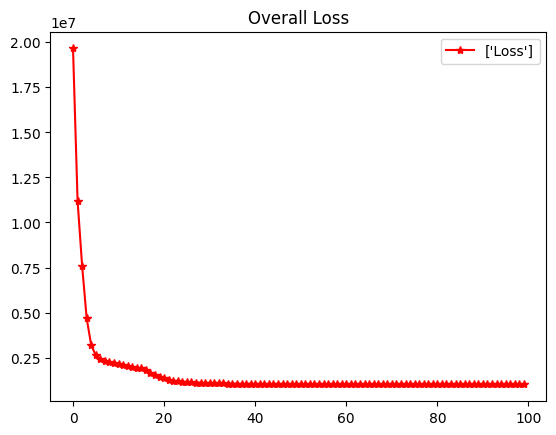

In [122]:
plt.plot(hist_['loss'],c='r',marker='*',label=['Loss'])
plt.title('Overall Loss')
plt.legend()

In [114]:
model.evaluate(X_test, y_test)

303/303 [==============================] - 1s 2ms/step - loss: 854876.6250


854876.625

In [115]:
prediction=model.predict(X_test)
prediction[0]

303/303 [==============================] - 1s 2ms/step


array([3635.9863], dtype=float32)

In [119]:
MAEValue = mean_absolute_error(y_test,prediction)
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test,prediction)
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test,prediction)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  516.4307135010396
Mean Squared Error Value is :  854876.5685705747
Median Absolute Error Value is :  222.432373046875


In [126]:
df=pd.DataFrame()
df['price'],df['prediction']=y_test,prediction
df

,price,prediction
47331,3292,3635.986328
47995,826,601.938354
46699,4588,5731.466309
15920,814,685.175842
140339,720,628.244629
...,...,...
52833,10339,8991.790039
73902,921,1181.773560
90109,4515,5080.699707
174805,654,660.314209


In [130]:
y_test=model.predict(test)

4033/4033 [==============================] - 7s 2ms/step


In [132]:
pred=pd.DataFrame(index=id)
pred['price']=y_test
pred.to_csv('/kaggle/working/prediction.csv')
pred

,price
id,
193573,687.085693
193574,2291.623047
193575,1758.106079
193576,667.622437
193577,4287.983398
...,...
322618,4020.669678
322619,1644.568970
322620,4717.432617
